## **Business** **Case** **Study**

---
The case study involves analyzing toy sales for a fictitous company in Mexico, Maven Toy Sales LLC. The data spans from January 1st 2017 to September 30th 2018, containing over 820,000 transactions for all stores owned by Maven Toys.

The objective is to prepare the data, analyze and visualize it, and subsequently outline findings which allow the toy store chain to optimize its decision making capabilities and boost profits.

The key areas of concern for the business entail understanding key insights related to:


1.   Profitable and loss-making stores
2.   Profitable and loss-making  products sold by the stores
3.   Popular products and produt categories
4.   Revenue generated from each store
5.   Revenue segmentation by product and product category

The questions highlighted above are inked to historical performance of Maven Toy Sales LLC.

The dataset is provided  #MavenAnalytics is perfect for applying your data exploration, analysis, and visualization skills. It simulates real world business scenarios and challenges.




# *Dataset Profile*

---
This dataset contains 4 tables, in CSV format:



*   The **Products** table contains the 35 products sold at Maven Toys (each record represents one product), with fields containing details about the product category, cost, and retail price
*   The **Stores **table contains the 50 Maven Toys store locations (each record represents one store), with fields containing details about the store location, type, and date it opened

*   The **Sales** table contains the units sold in over 800,000 sales transactions from January 2017 to October 2018 (each record represents the purchase of a specific product at a specific store on a specific date)
*   The **Inventory** table contains over 1,500 records that represent the stock on hand of each product in each store at the current point in time (Oct 1, 2018)






# *Recomended* Analysis

---

1. Which product categories drive the biggest profits? Is this the same across 

store locations?

2. Can you find any seasonal trends or patterns in the sales data?

3. Are sales being lost with out-of-stock products at certain locations?

4. How much money is tied up in inventory at the toy stores? How long will it last?

# New Section

# **Data Analytics Segment**

# **Loading Libraries**


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


**Loading the datasets**

Sales Dataset

In [113]:
sales_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sales.csv')
print("Sales Information \n")
sales_df.head() #prints first 5 rows of dataset


Sales Information 



,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


Inventory Dataset

In [114]:
inventory_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/inventory.csv')
print("Invetory Information \n")
inventory_df.head()

Invetory Information 



,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


Products Dataset

In [115]:
products_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/products.csv')
print("Products Information \n")
products_df.head()

Products Information 



,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


Stores Dataset

In [116]:
stores_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/stores.csv')
print("Stores Information \n")
stores_df.head()

Stores Information 



,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


**Exploratory** **Data** **Analysis**
---

Exploratory data analysis involves investigating and summarizing key insights linked to the data. The process provides answers to imperative questions that arise when processing(cleaning) the data.

EDA conucted in this project will combine data processing steps. Key goals looking to be achieved by implementing EDA include:



*   Discovering the underlying structure of the datasets
*   Extract patterns, anomalies and trends in the datasets
*   Test hypotheses and validate assumptions about the data
*   Forecast what problems could be solved by insights extracted from the datasets


 




**Step 1: Find Missing Values**

In [117]:
#Missing values in  sales_df dataset
sales_df.isna().sum()


Sale_ID       0
Date          0
Store_ID      0
Product_ID    0
Units         0
dtype: int64

In [118]:
#Missing values in  inventory_df dataset
inventory_df.isna().sum()


Store_ID         0
Product_ID       0
Stock_On_Hand    0
dtype: int64

In [119]:
#Missing values in  sales_df dataset
products_df.isna().sum()


Product_ID          0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
dtype: int64

In [120]:
#Missing values in  stores_df dataset
stores_df.isna().sum()


Store_ID           0
Store_Name         0
Store_City         0
Store_Location     0
Store_Open_Date    0
dtype: int64

There are no missing values in all the four datasets

**Step 2: Find Duplicate Values in All Datasets**

In [121]:
#Missing values in  sales_df dataset
sales_df.duplicated().sum()


0

In [122]:
#Missing values in  stores_df dataset
stores_df.duplicated().sum()


0

In [123]:
#Missing values in  inventory_df dataset
inventory_df.duplicated().sum()


0

In [124]:
#Missing values in  stores_df dataset
products_df.duplicated().sum()


0

There are no duplicate values in all the four datasets

**Step 3: Explore individual and merged datasets.** 

---



The essential aspects being explored include:


1.   Basic information about the data: data type and variables(columns)
2.   Summary statistics
3.   Asking specific questions related to the dataset
4.   Visualizations of key questions relating to the dataset
5.   Providing answers to questions asked in recomended analysis section



***Step 3 a): stores_df Analysis***

In [125]:
#Basic information about the data
print(stores_df.info())

#Dataset contns 50 rows, 5 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store_ID         50 non-null     int64 
 1   Store_Name       50 non-null     object
 2   Store_City       50 non-null     object
 3   Store_Location   50 non-null     object
 4   Store_Open_Date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB
None


Store_Open_Date column data type is string, intead of datetime object. Let's change the column from string to datetime data type format.

In [126]:
stores_df["Store_Open_Date"] = pd.to_datetime(stores_df["Store_Open_Date"])
stores_df.dtypes
#The Store_Open_Date is now in the correct data type format

Store_ID                    int64
Store_Name                 object
Store_City                 object
Store_Location             object
Store_Open_Date    datetime64[ns]
dtype: object

In [127]:
#Summary statistsics 
print(stores_df.describe().T)

          count  mean       std  min    25%   50%    75%   max
Store_ID   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0


In [128]:
#Variable names of the dataset
stores_df.columns

Index(['Store_ID', 'Store_Name', 'Store_City', 'Store_Location',
       'Store_Open_Date'],
      dtype='object')

In [129]:
#Quiz 1: How many cities and locations did the stores distribute??
no_of_cities = stores_df['Store_City'].nunique()
no_of_locations = stores_df["Store_Location"].nunique()
locations = stores_df["Store_Location"].unique()
print(f"Maven Toy Sales operates  in {no_of_cities} cities")
print(f"Stores are located in {no_of_locations} major locations: {locations}")

Maven Toy Sales operates  in 29 cities
Stores are located in 4 major locations: ['Residential' 'Commercial' 'Downtown' 'Airport']


In [130]:
#Quiz 2: Identify oldest and newest stores opened by the company in terms of opening date?
year = pd.DatetimeIndex(stores_df['Store_Open_Date']).year
stores_df['Store_Age'] = 2023 - year
new_stores = stores_df.sort_values('Store_Age')
print('The top 3 newest stores were:\n')
new_stores.head(3)

The top 3 newest stores were:



,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Store_Age
49,50,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,7
48,49,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,7
47,48,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,7


In [131]:
old_stores = stores_df.sort_values("Store_Open_Date", ascending=True)
print("The top 3 oldest stores were:\n")
old_stores.head(3)

The top 3 oldest stores were:



,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Store_Age
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,31
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,28
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27,24


***Step 3 b): products_df Analysis***

In [132]:
#Basic information about the data
print(products_df.info())

#Dataset contns 50 rows, 5 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB
None


Product_Cost and Product_Price data types are incorrect. They should be numerical. The dollar signs in the two columns will be removed before converting them to float data type.

Additionally, two new variables: product_return and return_rate wiil be added to the dataframe.

Product_Return depicts gain attributed to the sale of that specific product.
Return_Rate computes the gain attributed to the sale of a product in percentage.

In [133]:
products_df['Product_Cost'] = products_df['Product_Cost'].replace({'\$': ''}, regex = True).astype(float)
products_df['Product_Price'] = products_df['Product_Price'].replace({'\$': ''}, regex = True).astype(float)
products_df['Product_Return'] = products_df['Product_Price'] - products_df['Product_Cost']
products_df['Return_Rate'] = round(products_df['Product_Return']/products_df['Product_Cost'], 2)
print('Product information')
products_df.head()

Product information


,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Return,Return_Rate
0,1,Action Figure,Toys,9.99,15.99,6.0,0.60
1,2,Animal Figures,Toys,9.99,12.99,3.0,0.30
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,1.01
3,4,Chutes & Ladders,Games,9.99,12.99,3.0,0.30
4,5,Classic Dominoes,Games,7.99,9.99,2.0,0.25


In [134]:
#data types of the updated columns
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        35 non-null     int64  
 1   Product_Name      35 non-null     object 
 2   Product_Category  35 non-null     object 
 3   Product_Cost      35 non-null     float64
 4   Product_Price     35 non-null     float64
 5   Product_Return    35 non-null     float64
 6   Return_Rate       35 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.0+ KB


In [135]:
#Summary statistics
products_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,35.0,18.000000,10.246951,1.00,9.50,18.00,26.50,35.00
Product_Cost,35.0,10.247143,6.563459,1.99,5.49,9.99,12.99,34.99
Product_Price,35.0,14.761429,7.491508,2.99,9.99,12.99,19.99,39.99
Product_Return,35.0,4.514286,3.165730,1.00,2.00,4.00,6.00,16.00
Return_Rate,35.0,0.598571,0.532939,0.10,0.25,0.40,0.87,2.34


In [136]:
#Quiz 1: Determine the number of products in each product category?
print("Number of products in each category:\n")
products_df['Product_Category'].value_counts()

Number of products in each category:



Toys                 9
Art & Crafts         8
Games                8
Sports & Outdoors    7
Electronics          3
Name: Product_Category, dtype: int64

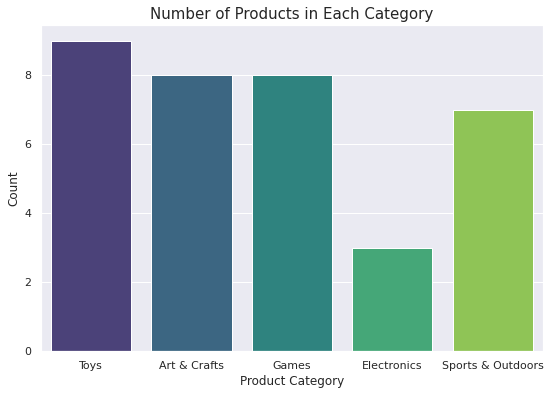

In [137]:
#Visualize number of produts in each category
sns.set(rc={"figure.figsize":(9, 6)})
sns.countplot(x = "Product_Category", data = products_df, palette = "viridis")
plt.title("Number of Products in Each Category", size = 15, weight = 500)
plt.xlabel("Product Category", size = 12)
plt.ylabel("Count", size = 12)
plt.show()

In [138]:
#Quiz 2: Which product(s) had the highest/lowest cost, price and return rate?

# Quiz 2a): Products with the lowest cost
products_df.groupby('Product_Name')['Product_Cost'].min().sort_values(ascending=True).head(3)



Product_Name
Barrel O' Slime    1.99
PlayDoh Can        1.99
Jenga              2.99
Name: Product_Cost, dtype: float64

In [139]:
#Quiz 2b): Products with the highest cost
products_df.groupby('Product_Name')['Product_Cost'].max().sort_values(ascending=False).head(3)

Product_Name
Lego Bricks        34.99
Toy Robot          20.99
PlayDoh Playset    20.99
Name: Product_Cost, dtype: float64

In [140]:
#Quiz 2c): Products with the lowest price 
products_df.groupby('Product_Name')['Product_Price'].min().sort_values(ascending=True).head(3)

Product_Name
PlayDoh Can        2.99
Barrel O' Slime    3.99
PlayDoh Toolkit    4.99
Name: Product_Price, dtype: float64

In [141]:
#Quiz 2d): Products with the highest price
products_df.groupby('Product_Name')['Product_Price'].max().sort_values(ascending=False).head(3)

Product_Name
Lego Bricks        39.99
Toy Robot          25.99
PlayDoh Playset    24.99
Name: Product_Price, dtype: float64

In [142]:
#Quiz 2e): Products with the lowest return
products_df.groupby('Product_Name')['Product_Return'].min().sort_values(ascending=True).head(3)

Product_Name
Dino Egg           1.0
Splash Balls       1.0
PlayDoh Toolkit    1.0
Name: Product_Return, dtype: float64

In [143]:
#Quiz 2f): Products with the highest return
products_df.groupby('Product_Name')['Product_Return'].max().sort_values(ascending=False).head(3)

Product_Name
Mini Basketball Hoop    16.0
Plush Pony              11.0
Etch A Sketch           10.0
Name: Product_Return, dtype: float64

In [144]:
#Quiz 3: Which category had the highest/lowest average return rate?

#Quiz 3a): Product category with the lowest average return rate
products_df.groupby('Product_Category')['Return_Rate'].mean().head(5)


Product_Category
Art & Crafts         0.647500
Electronics          0.593333
Games                0.751250
Sports & Outdoors    0.511429
Toys                 0.488889
Name: Return_Rate, dtype: float64

Based on  results of average return per product category, Games had the highest return rate (75.3%) and Toys had the lowest return rate (48.9%).

***Step 3 c): inventory_df Analysis***

Inventory analysis will enebale us answer some of the questions in recommended analysis.
Creating a combined dataset that links three datasets: products_df, stores_df and inventory_df

The new dataset will be called prod_inven_store

In [145]:
#merge inventory_df with store_df
inven_store = pd.merge(inventory_df, stores_df, on="Store_ID")
inven_store.head(3)

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Store_Age
0,1,1,27,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,31
1,1,2,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,31
2,1,3,32,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,31


In [146]:
#merge inven_store with products_df
prod_inven_store = pd.merge(inven_store, products_df, on="Product_ID")
prod_inven_store.head(2)

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Store_Age,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Return,Return_Rate
0,1,1,27,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,31,Action Figure,Toys,9.99,15.99,6.0,0.6
1,2,1,0,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,28,Action Figure,Toys,9.99,15.99,6.0,0.6


Based on columns of the newly created dataset, prod_inven_store, some columns will be excluded from the analysis. Only relevant columns suitable aligned to answering our questions will be used.

First we need to compute inventory value(cost) of our stock, and store it in a new column:Inventory_Value

The second step entails dropping the following columns: 

*   Store_ID
*   Product_ID
*   Store_Open_Date
*   Return_Rate
*   Store_Age

The final step involves computing inventory value in terms of revenue: enables us forecast potaential sales associated with inventory held by 50 stores.



***Compute Inventory Value in terms of Cost***

In [147]:
prod_inven_store["Inventory_Value"] = prod_inven_store["Stock_On_Hand"] * prod_inven_store["Product_Cost"]
#Drop irrelevant columns in our dataset
prod_inven_store = prod_inven_store.drop(['Store_ID', 'Product_ID', 'Store_Open_Date', 'Return_Rate', 
                         'Product_Return','Store_Age'], axis = 1)
prod_inven_store.head(3)

,Stock_On_Hand,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Inventory_Value
0,27,Maven Toys Guadalajara 1,Guadalajara,Residential,Action Figure,Toys,9.99,15.99,269.73
1,0,Maven Toys Monterrey 1,Monterrey,Residential,Action Figure,Toys,9.99,15.99,0.00
2,17,Maven Toys Guadalajara 2,Guadalajara,Commercial,Action Figure,Toys,9.99,15.99,169.83


In [148]:
#Quiz 1: How many products did each store have?
print("Products in each store: \n")

no_of_products = prod_inven_store.groupby("Store_Name")["Product_Name"].count()
no_of_products = no_of_products.reset_index()
no_of_products

Products in each store: 



,Store_Name,Product_Name
0,Maven Toys Aguascalientes 1,35
1,Maven Toys Campeche 1,35
2,Maven Toys Campeche 2,35
3,Maven Toys Chetumal 1,35
4,Maven Toys Chihuahua 1,35
5,Maven Toys Chihuahua 2,35
6,Maven Toys Chilpancingo 1,29
7,Maven Toys Ciudad Victoria 1,29
8,Maven Toys Ciudad de Mexico 1,35
9,Maven Toys Ciudad de Mexico 2,29


In [149]:
#Quiz 2: Calculate Total Inventory Value(Cost) for all the stores 
total_stock_value = round(prod_inven_store["Inventory_Value"].sum(), 2)
total_stock_value
print(f"The total value of inventory for all stores is {total_stock_value}")

The total value of inventory for all stores is 300209.58


In [150]:
#Quiz 3: What is the average stock value of each store?
average_stock_value_per_store = total_stock_value / 50 #The company owns 50 stores
print(f"Average stock value for each store is {average_stock_value_per_store}")

Average stock value for each store is 6004.1916


In [151]:
#Quiz 4: Compute stock value for each store
print("The  stock value for each store is: \n")
individual_stock_value = round(prod_inven_store.groupby("Store_Name")["Inventory_Value"].sum().sort_values(ascending=False), 0)
individual_stock_value = individual_stock_value.reset_index()
individual_stock_value

The  stock value for each store is: 



,Store_Name,Inventory_Value
0,Maven Toys Ciudad de Mexico 2,8918.0
1,Maven Toys Hermosillo 1,7923.0
2,Maven Toys Hermosillo 3,7666.0
3,Maven Toys Saltillo 2,7579.0
4,Maven Toys Chihuahua 2,7565.0
5,Maven Toys Culiacan 1,7416.0
6,Maven Toys Hermosillo 2,7410.0
7,Maven Toys Chihuahua 1,7094.0
8,Maven Toys Toluca 1,6918.0
9,Maven Toys Guanajuato 3,6886.0


In [154]:
#Quiz 6: The average stock value for each store is: \n")
individual_product_value = round(prod_inven_store.groupby("Product_Name")["Stock_On_Hand"].sum().sort_values(ascending=False), 0)
individual_product_value = individual_product_value.reset_index()
individual_product_value

,Product_Name,Stock_On_Hand
0,Deck Of Cards,2738
1,Dinosaur Figures,2272
2,PlayDoh Can,2129
3,Magic Sand,1922
4,Rubik's Cube,1497
5,PlayDoh Toolkit,1387
6,Barrel O' Slime,1282
7,Nerf Gun,1212
8,Colorbuds,1159
9,Lego Bricks,1118


***Compute Inventory Value in terms of Revenue***

In [156]:
#Ascertain value of inventory in terms of potential sales
prod_inven_store["Inventory_Revenue"] = prod_inven_store["Stock_On_Hand"] * prod_inven_store["Product_Price"]

prod_inven_store.head(3)

,Stock_On_Hand,Store_Name,Store_City,Store_Location,Product_Name,Product_Category,Product_Cost,Product_Price,Inventory_Value,Inventory_Revenue
0,27,Maven Toys Guadalajara 1,Guadalajara,Residential,Action Figure,Toys,9.99,15.99,269.73,431.73
1,0,Maven Toys Monterrey 1,Monterrey,Residential,Action Figure,Toys,9.99,15.99,0.00,0.00
2,17,Maven Toys Guadalajara 2,Guadalajara,Commercial,Action Figure,Toys,9.99,15.99,169.83,271.83


In [157]:
#Quiz 1: Calculate revenue of inventory held in terms of product name?
print("Total inventory revenue for each product: \n")

no_of_products_by_name = prod_inven_store.groupby("Product_Name")["Inventory_Revenue"].sum().sort_values(ascending=False)
no_of_products_by_name = no_of_products.reset_index()
no_of_products_by_name

Total inventory revenue for each product: 



,index,Store_Name,Product_Name
0,0,Maven Toys Aguascalientes 1,35
1,1,Maven Toys Campeche 1,35
2,2,Maven Toys Campeche 2,35
3,3,Maven Toys Chetumal 1,35
4,4,Maven Toys Chihuahua 1,35
5,5,Maven Toys Chihuahua 2,35
6,6,Maven Toys Chilpancingo 1,29
7,7,Maven Toys Ciudad Victoria 1,29
8,8,Maven Toys Ciudad de Mexico 1,35
9,9,Maven Toys Ciudad de Mexico 2,29


In terms of quantity, Deck of Cards had the highest stock number; 2738. 

In terms of revenue held by products,Lego Bricks had the highest margin; 44,708

***Compute Inventory in terms of Profit***

Ascertaining profits tied-up in inventory will enable us realize the profit margins the company can realize if stock is sold off to customers at a quicker rate.

In [159]:
#compute total revenue of held-up-stock
total_stock_revenue = round(prod_inven_store['Inventory_Revenue'].sum(), 2)
total_stock_revenue

410240.58

In [160]:
#calculate profit hek up in inventory
total_inventory_profit = total_stock_revenue - total_stock_value
total_inventory_profit

110031.0

***Step 4: sales_df Analysis***

Sales analysis will enebale us answer some of the questions in recommended analysis.
Creating a combined dataset that links sales_df with products_df and stores_df

The new dataset will be called sales

In [161]:
#merge sales_df with products_df
sales = pd.merge(sales_df, products_df)
sales.head(2)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Return,Return_Rate
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,0.3
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,0.3


In [162]:
#merge sales with stores_df
sales = pd.merge(sales, stores_df)
sales.head(2)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Return,Return_Rate,Store_Name,Store_City,Store_Location,Store_Open_Date,Store_Age
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,0.3,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,13
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,0.3,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,13


 Drop the following columns: 

*   Store_ID
*   Product_ID
*   Sale_ID
*   Store_Open_Date
*   Return_Rate
*   Store_Age

They will not be relevant in our analysis


In [163]:
#Dropping irrelevant columns
sales = sales.drop(['Store_ID','Sale_ID','Product_ID', 'Store_Open_Date','Return_Rate', 'Store_Age'], axis = 1)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829262 entries, 0 to 829261
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              829262 non-null  object 
 1   Units             829262 non-null  int64  
 2   Product_Name      829262 non-null  object 
 3   Product_Category  829262 non-null  object 
 4   Product_Cost      829262 non-null  float64
 5   Product_Price     829262 non-null  float64
 6   Product_Return    829262 non-null  float64
 7   Store_Name        829262 non-null  object 
 8   Store_City        829262 non-null  object 
 9   Store_Location    829262 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 69.6+ MB
